In [141]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import Image  

In [17]:
def load_data():
    """
    For Loading and preprocessing the CIFAR-10 dataset.
    proprocessing includes normalizing the pixel values of images and one-hot encoding of the labels.
    Returns: training_images, training_labels, test_images, test_labels
    """
    # Loading the cifar-10 dataset
    (training_images, training_labels), (test_images, test_labels) = datasets.cifar10.load_data()

    # normalizing pixel values (between [0, 1])
    training_images, test_images = training_images / 255.0, test_images / 255.0

    # One-hot encoding the labels
    training_labels = tf.keras.utils.to_categorical(training_labels, 10)
    test_labels = tf.keras.utils.to_categorical(test_labels, 10)

    return (training_images, training_labels), (test_images, test_labels)

In [112]:
def build_model():
    """
    For Building a CNN model for cifar-10.
    """
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(256, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),

        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(10, activation='softmax')
    ])

    # Compiling the model
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

In [113]:
def image_augmenter():
    """
    Image data augmenter
    Returns: datagen, which is the ImageDataGenerator object.
    """
    datagen = ImageDataGenerator(
        rotation_range=20,       # Randomly rotate images by 15 degrees
        width_shift_range=0.1,  # Randomly shift images horizontally by 10%
        height_shift_range=0.1, # Randomly shift images vertically by 10%
        horizontal_flip=True,   # Randomly flip images horizontally
    )
    return datagen

In [114]:
def train_model(model, training_images, training_labels, test_images, test_labels, epochs=50):
    """
    For Training the model and plot training history.
    Args:
        model: The compiled model defined before.
        training_images, training_labels: Training data.
        test_images, test_labels: Validation data.
        epochs: Number of epochs to train.
        batch_size: Batch size for training.
    Returns:
        history
    """
    #Creating an image augmenter
    datagen = image_augmenter()
    
    # Training the model
    history = model.fit(datagen.flow(training_images, training_labels), epochs=epochs,
                        steps_per_epoch= (X_train.shape[0] // 64), validation_data= (test_images, test_labels))

    return history

In [115]:
def evaluate_model(model, test_images, test_labels):
    """
    For evaluating the results of the model on the test set.
    Args:
        model: The compiled model defined before.
        test_images, test_labels: Test data.
    """
    Loss, Accuracy = model.evaluate(test_images, test_labels)
    print(f'\nTest accuracy: {Accuracy:.4f}')
    print(f'\nTest loss: {Loss:.4f}')

In [116]:
def plot_training_history(history):
    """
    for plotting the training and validation accuracy/loss.
    Args:
        history: Training history returned by model.fit() executed on the training cell before this.
    """
    # Plot for accuracy
    plt.plot(history.history['accuracy'], label = 'Training Accuracy')
    plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()

    # Plot for loss
    plt.plot(history.history['loss'], label = 'Training Loss')
    plt.plot(history.history['val_loss'], label = 'Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()

    plt.show()

<font size="60">THE MODEL IN USE BELOW</font>

In [117]:
# Loading the CIFAR-10 dataset and preprocessing it
(X_train, y_train), (X_test, y_test) = load_data()

print(X_train.shape, y_train.shape)

(50000, 32, 32, 3) (50000, 10)


In [118]:
# Building the model
model = build_model()

model.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_48 (Conv2D)                   │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_49 (Conv2D)                   │ (None, 28, 28, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_24 (MaxPooling2D)      │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_50 (Conv2D)                   │ (None, 12, 12, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_25 (MaxPooling2D)      │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_51 (Conv2D)                   │ (None, 4, 4, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_26 (MaxPooling2D)      │ (None, 2, 2, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_12 (Flatten)                 │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 128)                 │         131,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_36 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 520,906 (1.99 MB)

 Trainable params: 520,906 (1.99 MB)

 Non-trainable params: 0 (0.00 B)

In [119]:
# Training the model
history = train_model(model, X_train, y_train, X_test, y_test, epochs = 50)

Epoch 1/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 102s 127ms/step - accuracy: 0.2123 - loss: 2.0803 - val_accuracy: 0.4313 - val_loss: 1.5487
Epoch 2/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 100s 128ms/step - accuracy: 0.4072 - loss: 1.6179 - val_accuracy: 0.5175 - val_loss: 1.3336
Epoch 3/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 21s 26ms/step - accuracy: 0.3750 - loss: 1.7720 - val_accuracy: 0.5164 - val_loss: 1.3227
Epoch 4/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 103s 132ms/step - accuracy: 0.4888 - loss: 1.4224 - val_accuracy: 0.5345 - val_loss: 1.2871
Epoch 5/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 100s 128ms/step - accuracy: 0.5315 - loss: 1.3116 - val_accuracy: 0.6133 - val_loss: 1.0874
Epoch 6/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.5312 - loss: 1.3183 - val_accuracy: 0.6137 - val_loss: 1.0875
Epoch 7/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 110s 141ms/step - accuracy: 0.5688 - loss: 1.2230 - val_accuracy: 0.6125 - val_loss: 1.1332
Epoch 8/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 118s 151ms/step - accuracy: 0.6009 - los

In [123]:
# Evaluating the model
Loss, Accuracy = model.evaluate(X_test, y_test)

print(f'Test accuracy: {Accuracy:.4f}')
print(f'Test accuracy: {Loss:.4f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7644 - loss: 0.7251
Test accuracy: 0.7615
Test accuracy: 0.7466


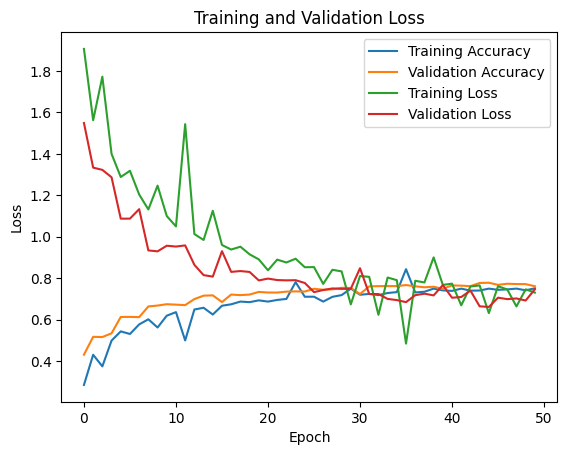

In [125]:
# Plotting training history
plot_training_history(history)

In [127]:
model.save('cifar10_model.h5')

<font size = "15">UPLOADING IMAGES OF MY OWN AND PREDICTING THEM VIA THE SAVED MODEL (for GIT)</font>

In [155]:
# Class names for CIFAR-10
CLASS_NAMES = [
    'airplane', 'automobile', 'bird', 'cat', 'deer',
    'dog', 'frog', 'horse', 'ship', 'truck'
]

In [156]:
def load_image(image_path):
    """
    Load and preprocess an image from a file path.
    Args:
        image_path: Path to the input image file.
    Returns:
        Preprocessed image as a NumPy array.
    """
    # Load the image using PIL
    image = Image.open(image_path)

    # Convert the image to RGB (remove alpha channel if present)
    image = image.convert('RGB')

    # Resize the image to 32x32 (CIFAR-10 input size)
    image = image.resize((32, 32))

    # Convert the image to a NumPy array
    image = np.array(image)

    # Normalize pixel values to [0, 1]
    image = image / 255.0

    return image

In [157]:
def load_model():
    """
    Load the saved model.
    Returns:
        Loaded model.
    """
    model = tf.keras.models.load_model('cifar10_model.h5')
    return model

In [160]:
def predict(image):
    """
    Makes a prediction for an input image using the trained/loaded model.
    Args:
        image: Input image as a numpy array.
    Returns:
        Predicted class label and confidence score.
    """
    # Adds batch dimension (model expects input shape [batch_size, 32, 32, 3])
    image = np.expand_dims(image, axis=0)

    # Makes the prediction
    predictions = model.predict(image)

    # For the predicted class label and confidence score
    predicted_class = np.argmax(predictions, axis=1)[0]
    confidence_score = np.max(predictions)
    return predicted_class, confidence_score

<font size = '15'>EXECUTING THE PREDICTION SCRIPT<font>

In [161]:
model = load_model()

image_path = 'C:\\Users\\Sumer Singh\\Documents\\cat.jpg' 
image = load_image(image_path) 

predicted_class, confidence_score = predict(image)

print(f'Predicted class: {CLASS_NAMES[predicted_class]}')
print(f'Confidence score: {confidence_score:.4f}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
Predicted class: cat
Confidence score: 0.5937


In [162]:
model = load_model()
image_path = 'C:\\Users\\Sumer Singh\\Documents\\plane.jpg' 
image = load_image(image_path)

predicted_class, confidence_score = predict(image)

print(f'Predicted class: {CLASS_NAMES[predicted_class]}')
print(f'Confidence score: {confidence_score:.4f}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step
Predicted class: airplane
Confidence score: 0.9175
